## Library import + definition of the network


In [11]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from library_2GMM import*

class TwoLayerDenoiser(nn.Module):
    def __init__(self, n, hidden_dim=256, L=3):
        super(TwoLayerDenoiser, self).__init__()
        self.lin0 = nn.Linear(42, L)                  # Time embedding φ → s
        self.lin1 = nn.Linear(n, hidden_dim)          # Input projection x → x1
        self.lin2 = nn.Linear(hidden_dim * L, n)      # Output projection

    def forward(self, x, alpha):
        batch_size = x.shape[0]
        alpha = alpha.unsqueeze(1)

        i_values = torch.arange(21, dtype=torch.float32, device=x.device)
        phi = torch.cat([torch.cos(alpha * i_values), torch.sin(alpha * i_values)], dim=1)

        s = self.lin0(phi)
        x1 = F.relu(self.lin1(x))

        outer_product = torch.einsum("bi,bj->bij", s, x1)  # Shape: (B, L, hidden_dim)
        x2 = outer_product.view(batch_size, -1)

        x_out = self.lin2(x2) + torch.cos(alpha).pow(2) * x
        return x_out



# Study of the RELU network in different scenarios

In [12]:
n = 128
p = 0.7
a = np.ones(n)

# 1st setting
samples = 5000,
epochs = 500,
hidden_dim = 256,
L = 3


In [13]:
num_samples = 5000
epochs = 500
hidden_dim = 256
L = 3

samples = construct_dataset(n, p, a, num_samples)

denoiser1 = TwoLayerDenoiser(n)

training(denoiser1, 
             samples,  
             num_epochs=epochs, 
             criterion = nn.MSELoss(), 
             lr=1e-3, 
             weight_decay=1e-4,
             alpha_max = np.pi/2-0.01)


Epoch [1/500] | Train Loss: 366.0449 | Val Loss: 109.3998% | 
Epoch [51/500] | Train Loss: 0.8109 | Val Loss: 63.2515% | 
Epoch [101/500] | Train Loss: 1.0171 | Val Loss: 69.8866% | 
Epoch [151/500] | Train Loss: 0.8931 | Val Loss: 60.6606% | 
Epoch [201/500] | Train Loss: 0.7708 | Val Loss: 64.8920% | 
Epoch [251/500] | Train Loss: 0.9589 | Val Loss: 65.6568% | 
Epoch [301/500] | Train Loss: 0.9623 | Val Loss: 62.8700% | 
Epoch [351/500] | Train Loss: 0.6246 | Val Loss: 64.2372% | 
Epoch [401/500] | Train Loss: 1.9616 | Val Loss: 72.1108% | 
Epoch [451/500] | Train Loss: 0.6996 | Val Loss: 64.5273% | 
Loaded best model with validation loss: 59.5977%


0

# 2nd setting

In [14]:
num_samples = 20000
epochs = 500
hidden_dim = 256
L = 3
K = 200
alpha_max = np.pi/2-0.2

samples = construct_dataset(n, p, a, num_samples)

denoiser2 = TwoLayerDenoiser(n)

training(denoiser2, 
             samples,  
             num_epochs=epochs, 
             criterion = nn.MSELoss(), 
             lr=1e-3, 
             weight_decay=1e-4,
             alpha_max = np.pi/2-0.01)


Epoch [1/500] | Train Loss: 104.3100 | Val Loss: 70.3140% | 
Epoch [51/500] | Train Loss: 0.8951 | Val Loss: 66.8313% | 
Epoch [101/500] | Train Loss: 0.7298 | Val Loss: 61.3316% | 
Epoch [151/500] | Train Loss: 0.7342 | Val Loss: 63.5523% | 
Epoch [201/500] | Train Loss: 0.6090 | Val Loss: 61.2755% | 
Epoch [251/500] | Train Loss: 2.5549 | Val Loss: 60.9388% | 
Epoch [301/500] | Train Loss: 1.0321 | Val Loss: 62.8535% | 
Epoch [351/500] | Train Loss: 0.6578 | Val Loss: 64.5469% | 
Epoch [401/500] | Train Loss: 0.8432 | Val Loss: 62.4379% | 
Epoch [451/500] | Train Loss: 0.6929 | Val Loss: 65.4286% | 
Loaded best model with validation loss: 60.0203%


0

# 3rd setting 

In [15]:
num_samples = 20000
epochs = 2000
hidden_dim = 256
L = 3
K = 200
alpha_max = np.pi/2-0.2

samples = construct_dataset(n, p, a, num_samples)

denoiser3 = TwoLayerDenoiser(n)

training(denoiser3, 
             samples,  
             num_epochs=epochs, 
             criterion = nn.MSELoss(), 
             lr=1e-3, 
             weight_decay=1e-4,
             alpha_max = np.pi/2-0.01)


Epoch [1/2000] | Train Loss: 319.1012 | Val Loss: 70.3917% | 
Epoch [51/2000] | Train Loss: 0.8334 | Val Loss: 62.6355% | 
Epoch [101/2000] | Train Loss: 0.7771 | Val Loss: 65.4496% | 
Epoch [151/2000] | Train Loss: 1.3144 | Val Loss: 61.3623% | 
Epoch [201/2000] | Train Loss: 1.0552 | Val Loss: 62.5580% | 
Epoch [251/2000] | Train Loss: 0.6705 | Val Loss: 61.6696% | 
Epoch [301/2000] | Train Loss: 0.6573 | Val Loss: 66.0531% | 
Epoch [351/2000] | Train Loss: 0.6862 | Val Loss: 63.0123% | 
Epoch [401/2000] | Train Loss: 0.7873 | Val Loss: 62.8130% | 
Epoch [451/2000] | Train Loss: 1.0990 | Val Loss: 65.5891% | 
Epoch [501/2000] | Train Loss: 1.2094 | Val Loss: 61.8150% | 
Epoch [551/2000] | Train Loss: 1.1961 | Val Loss: 64.1643% | 
Epoch [601/2000] | Train Loss: 1.0582 | Val Loss: 61.9314% | 
Epoch [651/2000] | Train Loss: 0.9904 | Val Loss: 61.7386% | 
Epoch [701/2000] | Train Loss: 0.7144 | Val Loss: 65.1862% | 
Epoch [751/2000] | Train Loss: 1.0819 | Val Loss: 63.1182% | 
Epoch [80

0

# 4th setting

In [16]:
num_samples = 20000
epochs = 2000
hidden_dim = 512
L = 6
K = 200
alpha_max = np.pi/2-0.2

samples = construct_dataset(n, p, a, num_samples)

denoiser4 = TwoLayerDenoiser(n)

training(denoiser4, 
             samples,  
             num_epochs=epochs, 
             criterion = nn.MSELoss(), 
             lr=1e-3, 
             weight_decay=1e-4,
             alpha_max = np.pi/2-0.01)

Epoch [1/2000] | Train Loss: 115.4083 | Val Loss: 65.5607% | 
Epoch [51/2000] | Train Loss: 0.8612 | Val Loss: 62.8322% | 
Epoch [101/2000] | Train Loss: 0.7903 | Val Loss: 67.5551% | 
Epoch [151/2000] | Train Loss: 0.9653 | Val Loss: 64.0502% | 
Epoch [201/2000] | Train Loss: 0.7122 | Val Loss: 61.4597% | 
Epoch [251/2000] | Train Loss: 1.0268 | Val Loss: 68.5963% | 
Epoch [301/2000] | Train Loss: 1.4157 | Val Loss: 61.4316% | 
Epoch [351/2000] | Train Loss: 0.8564 | Val Loss: 60.9950% | 
Epoch [401/2000] | Train Loss: 1.2266 | Val Loss: 61.8004% | 
Epoch [451/2000] | Train Loss: 0.6870 | Val Loss: 62.2897% | 
Epoch [501/2000] | Train Loss: 1.3554 | Val Loss: 66.9549% | 
Epoch [551/2000] | Train Loss: 0.6867 | Val Loss: 65.5290% | 
Epoch [601/2000] | Train Loss: 1.2344 | Val Loss: 65.3492% | 
Epoch [651/2000] | Train Loss: 1.0212 | Val Loss: 61.9263% | 
Epoch [701/2000] | Train Loss: 0.7613 | Val Loss: 61.5452% | 
Epoch [751/2000] | Train Loss: 1.0150 | Val Loss: 60.9476% | 
Epoch [80

0

T max: 99.33
T max: 99.33
T max: 99.33
T max: 99.33


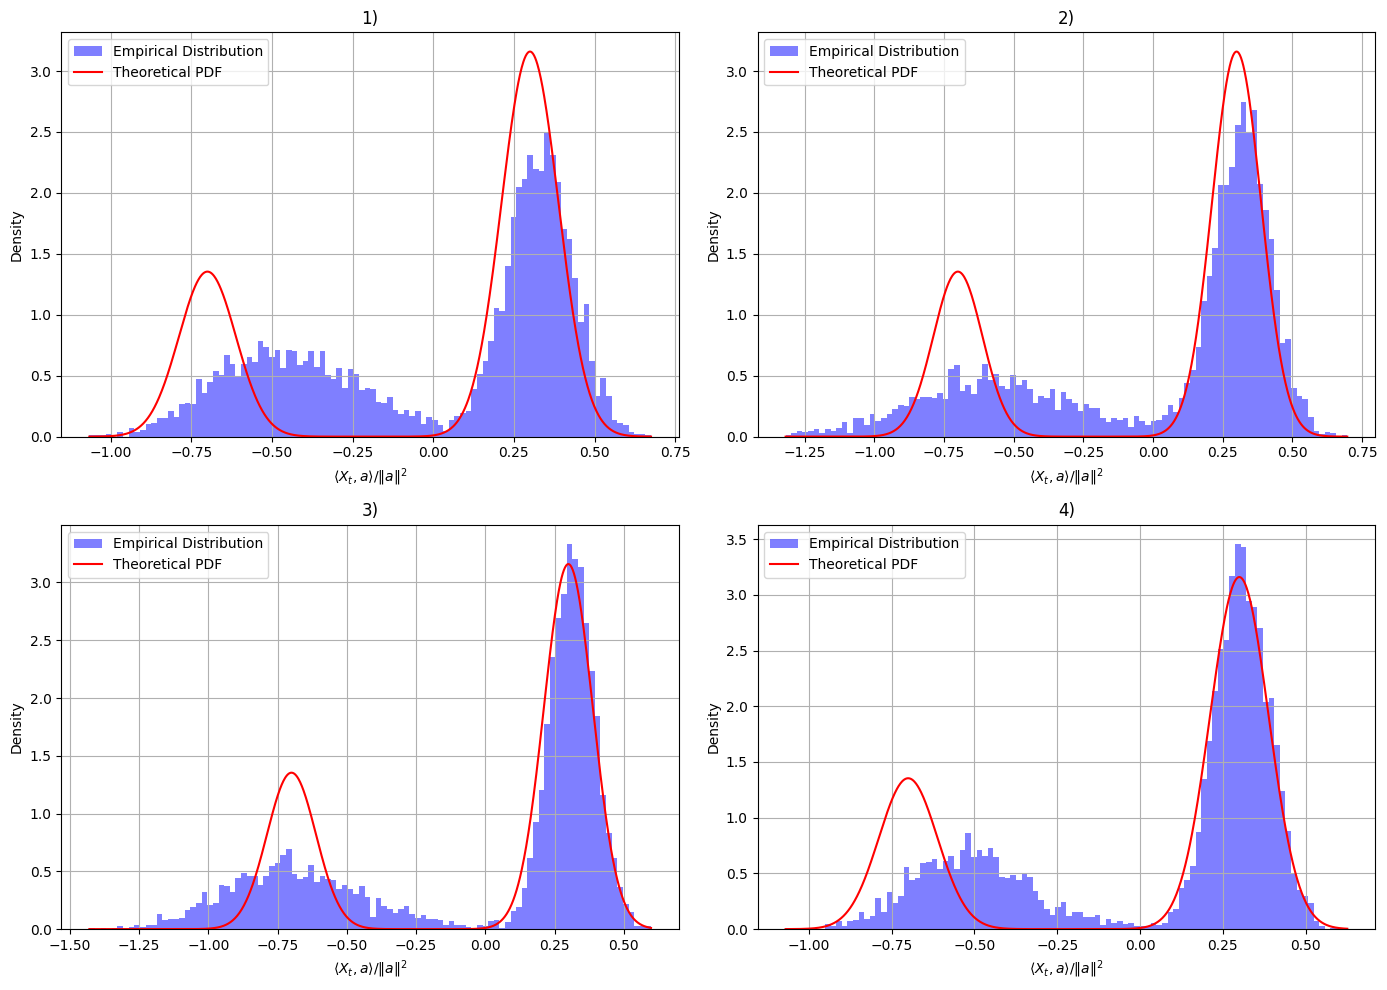

In [17]:
alpha_max = np.pi/2-0.1
K = 200

# Assume you've already created these with different seeds/models
target_samples1 = forward_sampling(alpha_max, K, denoiser1, n, num_samples_target=5000, path=False)
target_samples2 = forward_sampling(alpha_max, K, denoiser2, n, num_samples_target=5000, path=False)
target_samples3 = forward_sampling(alpha_max, K, denoiser3, n, num_samples_target=5000, path=False)
target_samples4 = forward_sampling(alpha_max, K, denoiser4, n, num_samples_target=5000, path=False)


datasets = [target_samples1, target_samples2, target_samples3, target_samples4]
titles = ["1)", "2)", "3)", "4)"]

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, samples in enumerate(datasets):
    plot_projected_dataset(samples, a, p, n, ax=axes[i])
    axes[i].set_title(titles[i])

plt.tight_layout()
plt.show()


# Comparison with the true conditional expectation
we use case 2

T max: 99.33


/Users/edotarci/Desktop/eth/2nd sem/semester project/codes april/library_2GMM.py:251: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  samples = torch.tensor(samples, dtype=torch.float32)


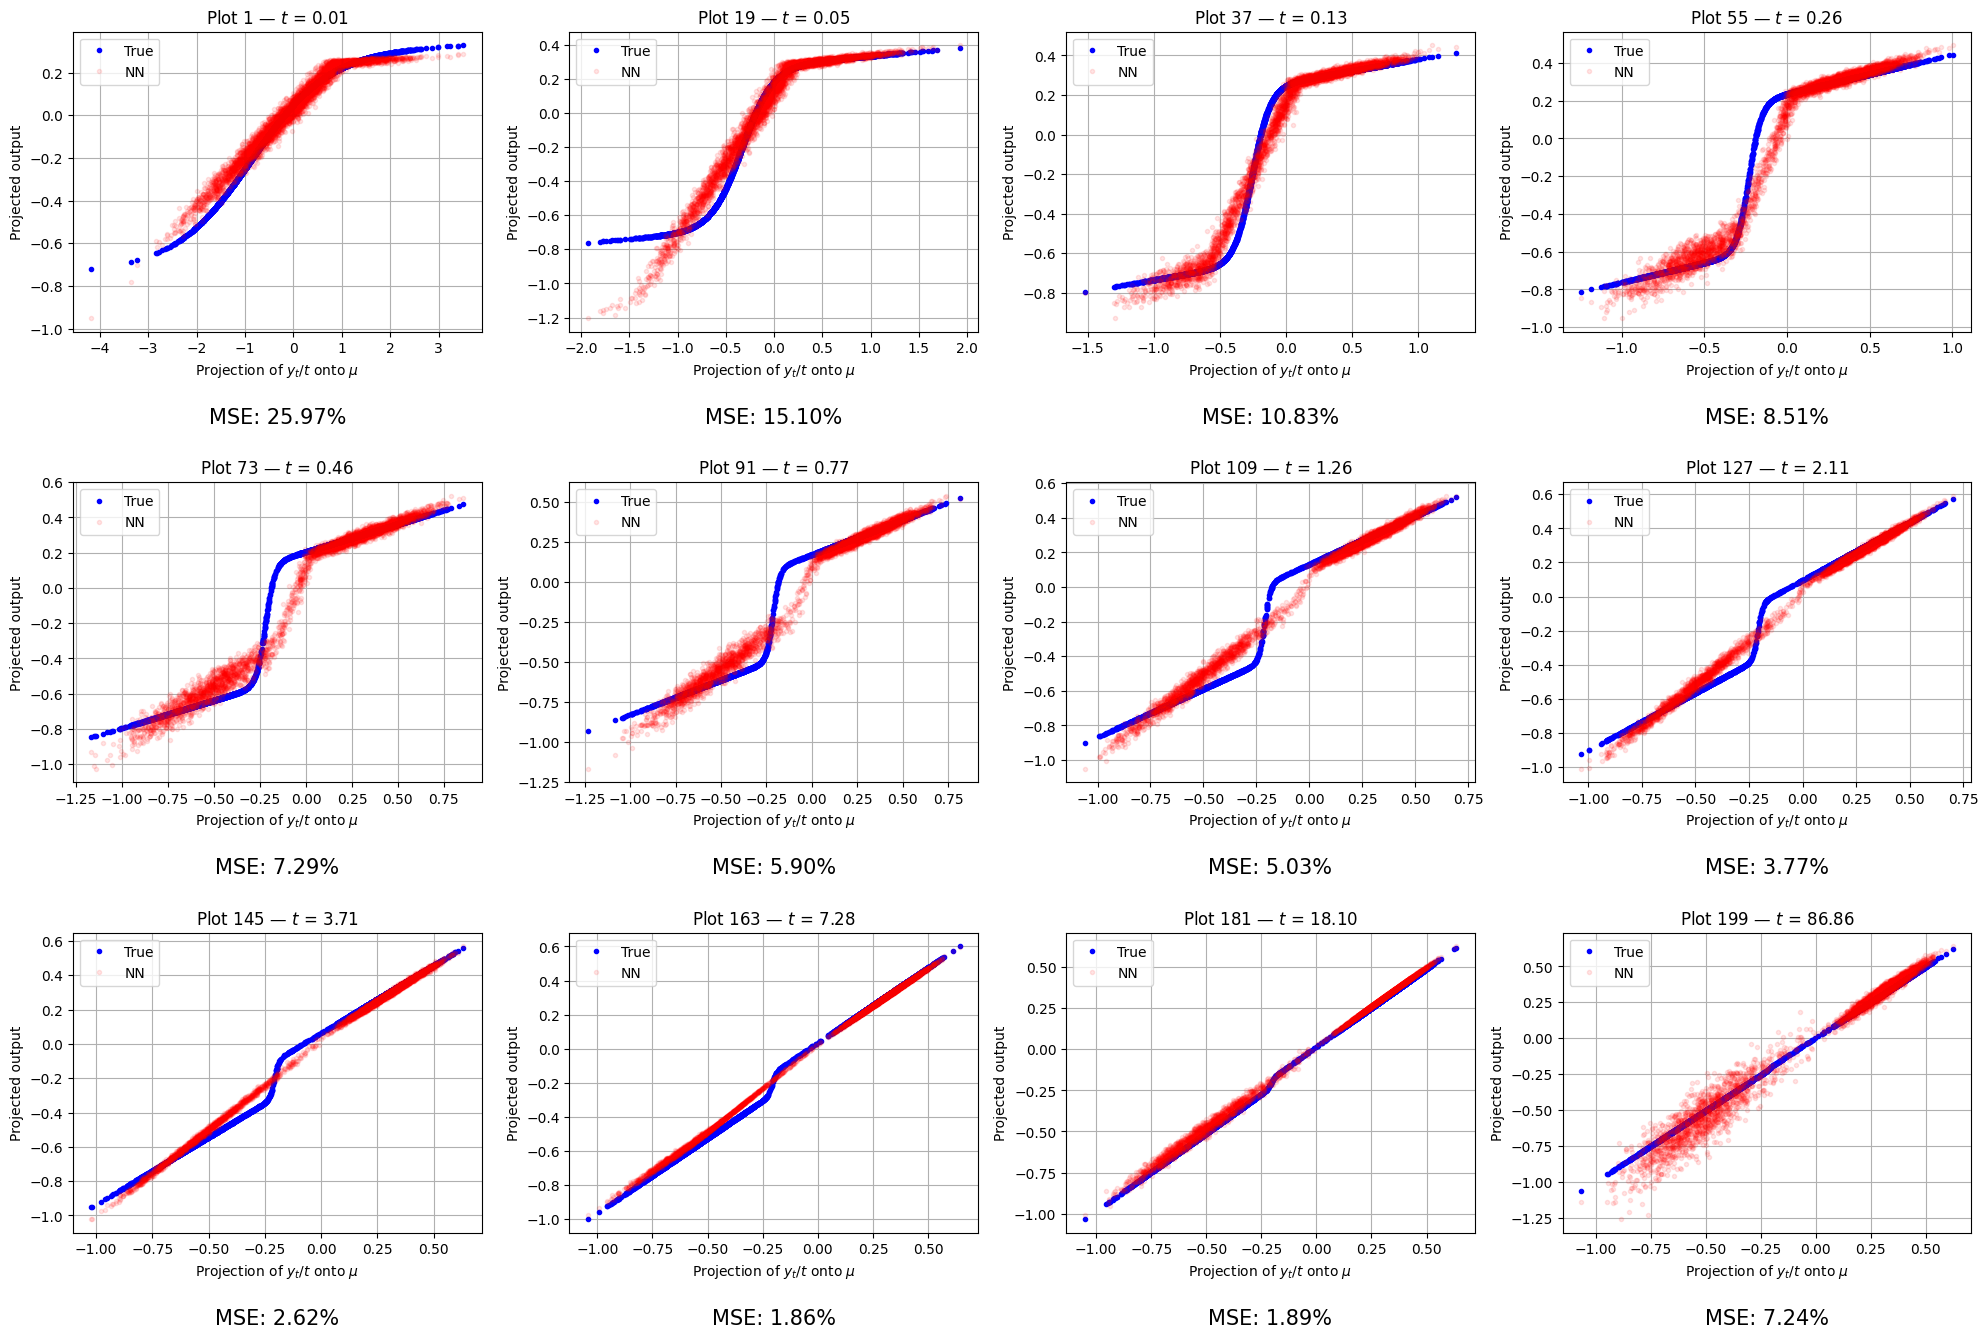

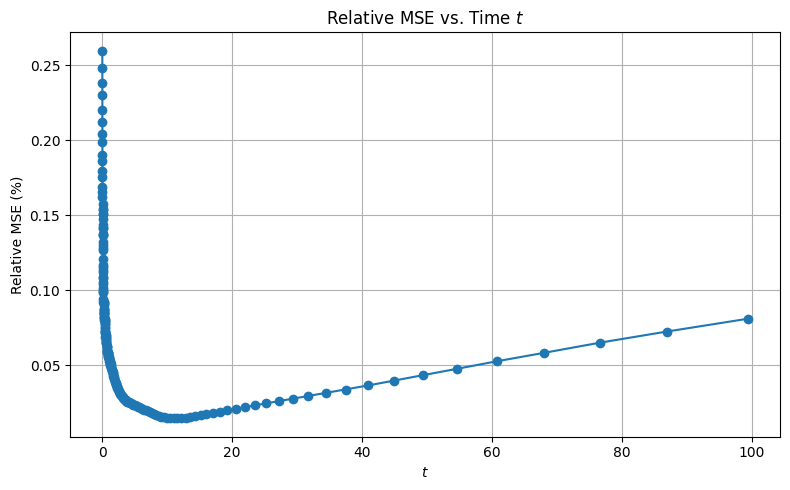

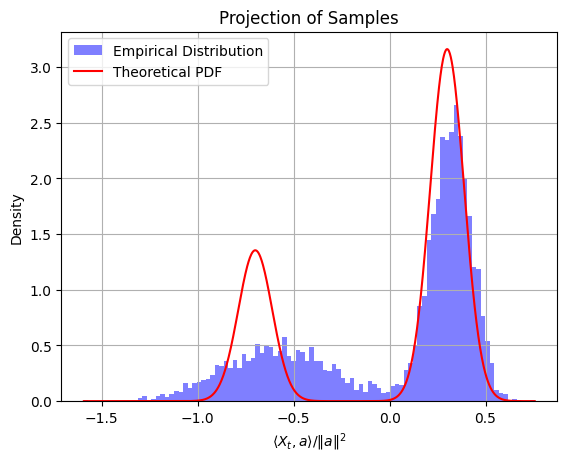

In [18]:
target_samples2 = forward_sampling(alpha_max, K, denoiser2, n, num_samples_target=5000, path=False)
evaluate_denoiser_on_gaussian_mixture(denoiser2, samples, plot_every=18)
plot_projected_dataset(target_samples2, a, p, n)
